In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
x = pd.read_excel('satisfaction.xlsx')

In [3]:
df = x.copy()

In [4]:
df.drop('id',axis=1,inplace = True)

I figured out that Departures are highly correlated in a later stage of the analysis so I decided to merge them from the begining and analyse the columns after that. Thus adding this line in the beginning.

In [5]:
df['Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis = 1, inplace=True)

In [6]:
df['Delay'] = pd.to_numeric(df['Delay'], errors='coerce')

df = df.dropna(subset=['Delay'])

df['Delay'] = df['Delay'].astype(int)

In [7]:
object_ = df.select_dtypes(include=['object']).copy()
df[object_.columns].nunique()

satisfaction_v2    2
Gender             2
Customer Type      2
Type of Travel     2
Class              3
dtype: int64

In [8]:
numeric_ = df.select_dtypes(exclude=['object']).copy()
df[numeric_.columns].nunique()

Age                                    75
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Delay                                 805
dtype: int64

In [9]:
cont_num_var = ['Flight Distance','Delay','Age']

disc_num_var = []

for i in numeric_.columns:
    if i not in cont_num_var:
        disc_num_var.append(i)
print('Continuous:')
print(cont_num_var)
print('Distinct:')
print(disc_num_var)

Continuous:
['Flight Distance', 'Delay', 'Age']
Distinct:
['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']


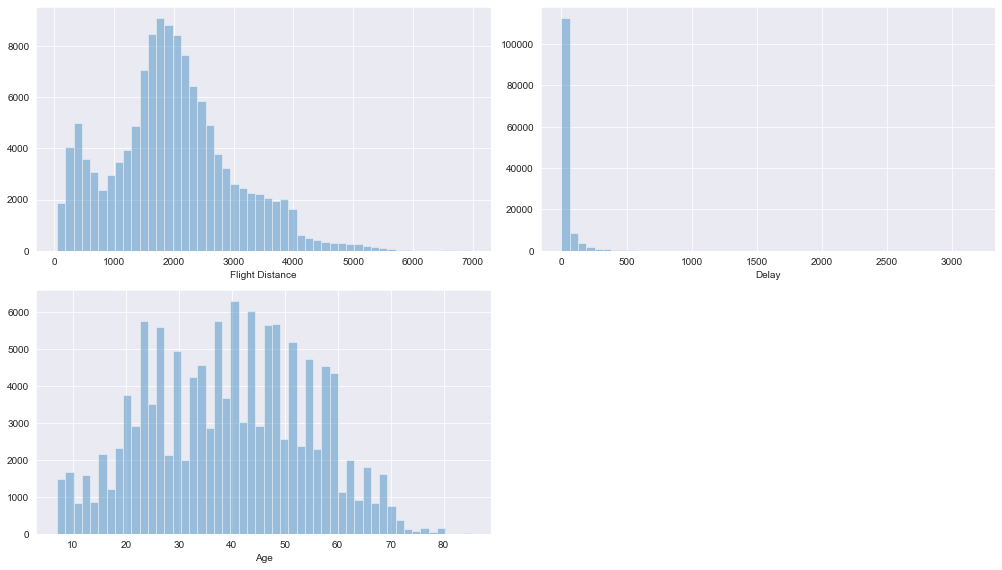

In [10]:
fig = plt.figure(figsize=(14,8))
for index,col in enumerate(cont_num_var):
    plt.subplot(2,2,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

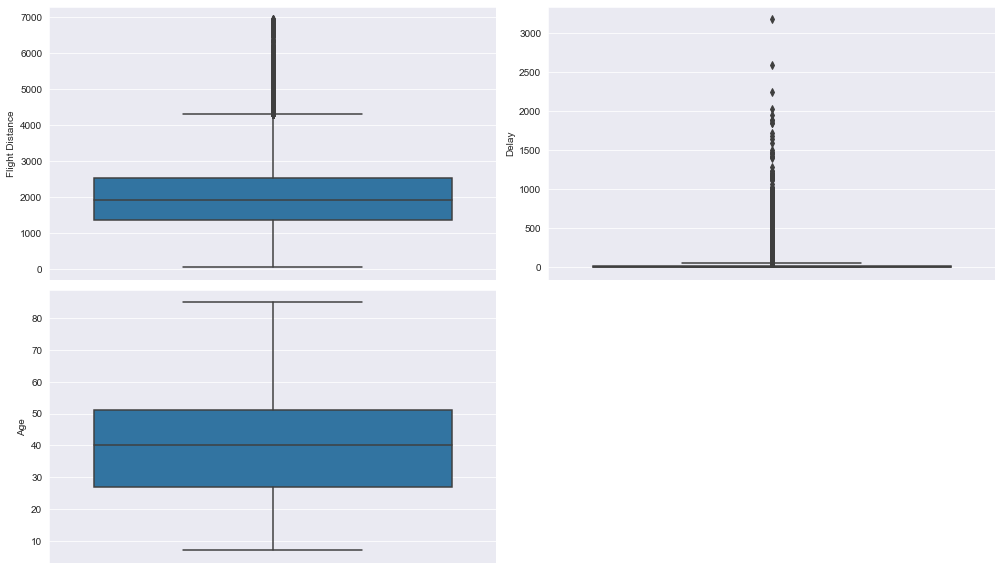

In [11]:
fig = plt.figure(figsize=(14,8))
for index,col in enumerate(cont_num_var):
    plt.subplot(2,2,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

In [12]:
df = df[df['Delay']<1000]
df = df[df['Flight Distance']<4200]
df = df[df['Age'].between(20,60)]

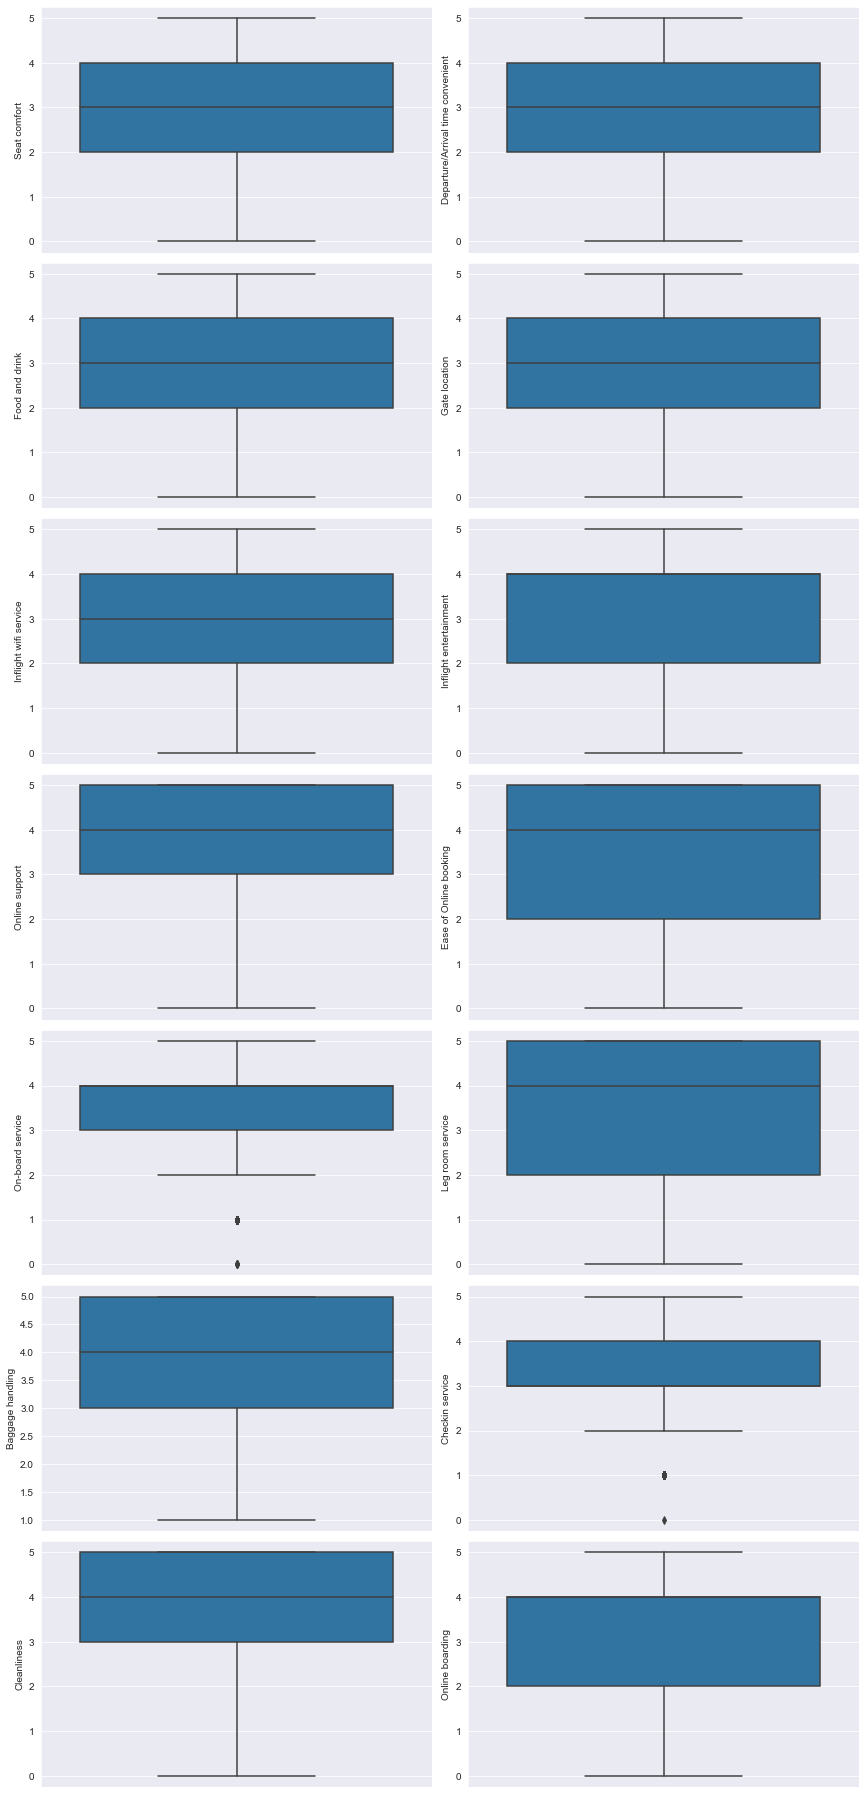

In [13]:
fig = plt.figure(figsize=(12,25))
for index,col in enumerate(disc_num_var):
    plt.subplot(7,2,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

In [14]:
df = df[df['Seat comfort'].between(1,5)]
df = df[df['Departure/Arrival time convenient'].between(1,5)]
df = df[df['Food and drink'].between(1,5)]
df = df[df['Gate location'].between(1,5)]
df = df[df['Inflight wifi service'].between(1,5)]
df = df[df['Inflight entertainment'].between(1,5)]
df = df[df['Online boarding'].between(1,5)]

df = df[df['Online boarding'] >=1]

In [15]:
df = df[df['Online support'] >=3]
df = df[df['Ease of Online booking'] >=2]

In [16]:
df = df[df['On-board service'] >=2]
df = df[df['Checkin service'] >=2]

In [17]:
df = df[df['Leg room service'] >=2]
df = df[df['Baggage handling'] >=3]
df = df[df['Cleanliness'] >=3]

In [18]:
cat_ = df.select_dtypes(include=['object']).copy()
cat_

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
1094,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco
1103,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco Plus
1129,neutral or dissatisfied,Female,Loyal Customer,Personal Travel,Eco
1214,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco
1232,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco
1273,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco
1276,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco
1307,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco
1312,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco
1317,neutral or dissatisfied,Male,Loyal Customer,Personal Travel,Eco


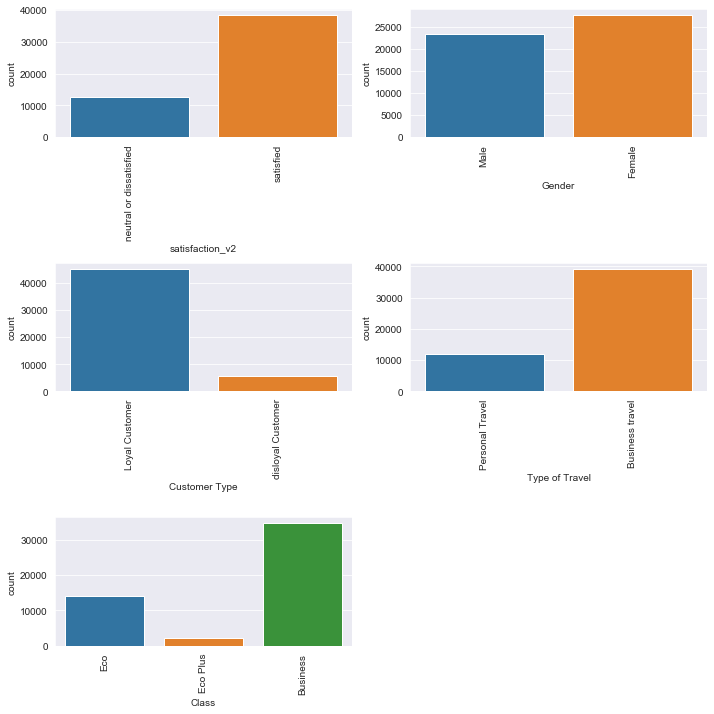

In [19]:
fig = plt.figure(figsize=(10,10))
for index in range(len(cat_.columns)):
    plt.subplot(3,2,index+1)
    sns.countplot(x=cat_.iloc[:,index], data=cat_.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

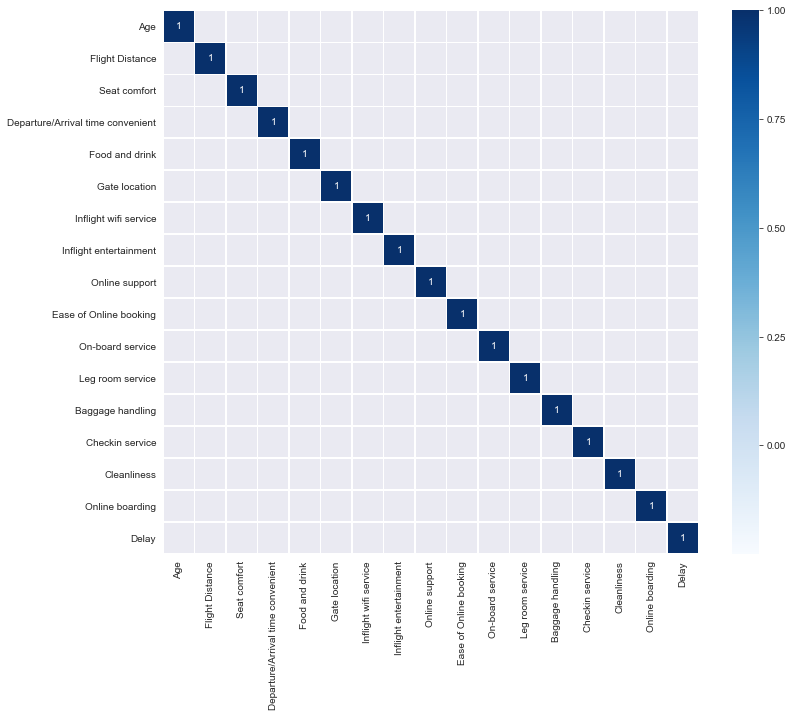

In [20]:
plt.figure(figsize=(12,10))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues',annot = True)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,51010.0,42.407567,10.873938,20.0,35.0,43.0,51.0,60.0
Flight Distance,51010.0,1915.423250,1019.699021,50.0,1125.0,1906.0,2599.0,4199.0
Seat comfort,51010.0,3.065830,1.327958,1.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,51010.0,3.128112,1.406999,1.0,2.0,3.0,4.0,5.0
Food and drink,51010.0,3.033954,1.356933,1.0,2.0,3.0,4.0,5.0
Gate location,51010.0,3.000961,1.359688,1.0,2.0,3.0,4.0,5.0
Inflight wifi service,51010.0,3.596393,1.129212,1.0,3.0,4.0,5.0,5.0
Inflight entertainment,51010.0,3.925701,1.083837,1.0,3.0,4.0,5.0,5.0
Online support,51010.0,4.259302,0.702778,3.0,4.0,4.0,5.0,5.0
Ease of Online booking,51010.0,4.166065,0.759529,2.0,4.0,4.0,5.0,5.0


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
for col in cat_.columns:
    df.loc[:,col] = le.fit_transform(df.loc[:,col])

In [24]:
X = df.iloc[:,1:].copy()
y = df.iloc[:,0].copy()

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [4])], remainder='passthrough')
df = ct.fit_transform(df)

C:\Users\ARNAB\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
X = pd.get_dummies(X)

cat_.drop(['Class','Customer Type'],axis=1,inplace=True)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
classifier = make_pipeline(StandardScaler(),LogisticRegression())
classifier.fit(X_train, y_train)

C:\Users\ARNAB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [30]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
a = ((cm[0,1]+cm[1,0])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]))*100
print('% Error = ',a)

% Error =  8.998235640070575


In [32]:
b = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]))*100
print('% Accuracy = ',b)

% Accuracy =  91.00176435992942
